### Task 1
I would like to gain insight as to what factors increase the chances of someone
purchasing a vehicle. For example I would like to be able to answer the
questions like is a twenty year old more likely to buy a car or is a fifty year
old? Or gain insight as to whether there a certain salary at which a person is
more likely to buy a car? Additionally, I would like to be able to predict the
likelihood of someone purchasing a car given some list of features. Logisitic
regression is best for this task because I am aiming to find a set of weights
which tell the probability of a binary parameter occuring (buying or not buying a
vehicle).


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("car_data.csv")
df


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


Percent Male: 48.4%
Salary min, max, mean, std: 15000, 152500, 72689.0, 34471.09338271706
Age min, max, mean, std: 18, 63, 40.106, 10.701717806034694


{'whiskers': [<matplotlib.lines.Line2D at 0x1f27798d8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f27798de50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f27797f460>],
 'medians': [<matplotlib.lines.Line2D at 0x1f27799d430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f27799d700>],
 'means': []}

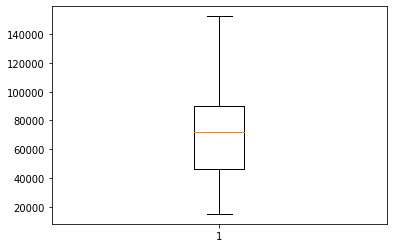

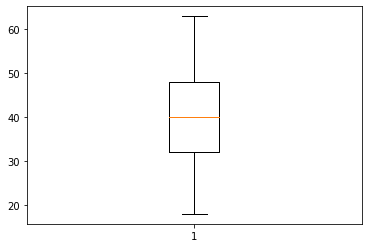

In [39]:
print("Percent Male: {}%".format(np.sum(np.asarray([df["Gender"] == "Male"]) * 1)/10))
print("Salary min, max, mean, std: {}, {}, {}, {}".format(np.min(df["AnnualSalary"]), np.max(df["AnnualSalary"]), np.mean(df["AnnualSalary"]), np.std(df["AnnualSalary"])))
print("Age min, max, mean, std: {}, {}, {}, {}".format(np.min(df["Age"]), np.max(df["Age"]), np.mean(df["Age"]), np.std(df["Age"])))

plt.figure(1)
plt.boxplot(df["AnnualSalary"])
plt.figure(2)
plt.boxplot(df["Age"])


### Task 2
The dataset for this problem comes from here:
https://www.kaggle.com/datasets/gabrielsantello/cars-purchase-decision-dataset.
Below, we can see that the data contains a unique user identification, gender,
age, annual salary, and whether or not the car was purchased. Columns two to
four  will be used as features, and the last column will be used as a label. We
do not use column one, the user identification, because it does not provide any
useful meaning for prediction.

Currently, the data is not ready for analysis. The gender column needs to be
relabelled as numbers: a male is 0 and a female is 1. Additionally, we exclude
the first column as mentioned above. According to the data, 48.4 percent are
male, which is a fairly even split. Also, the salary and age values cover a
wide range. 

### Task 3

### Task 4